In [1]:
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path("..").resolve()
sys.path.append(str(project_root))

import numpy as np
import matplotlib.pyplot as plt
from experiments.datasets import make_linear_data
from experiments.datasets import plot_data
from src.models.perceptron import Perceptron
from experiments.train import train

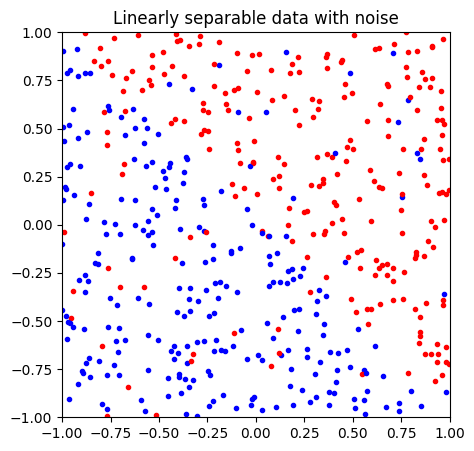

In [2]:
X_states, y_labels = make_linear_data(p=500, noise_rate=0.1)

plot_title = ("Linearly separable data with noise")
plot_data(X_states, y_labels, plot_title)


In [3]:
model = Perceptron(input_dim=2, lr=0.1)

outputs = model.forward(X_states)
w, b = model.w, model.b

loss = 0.5 * ((y_labels - outputs)**2).mean()
predictions = model.predict(X_states)
accuracy = (predictions == y_labels).mean()

print(f"Loss before training: {loss:.4f} – Accuracy before training: {accuracy:.2f}")

Loss before training: 0.6802 – Accuracy before training: 0.38


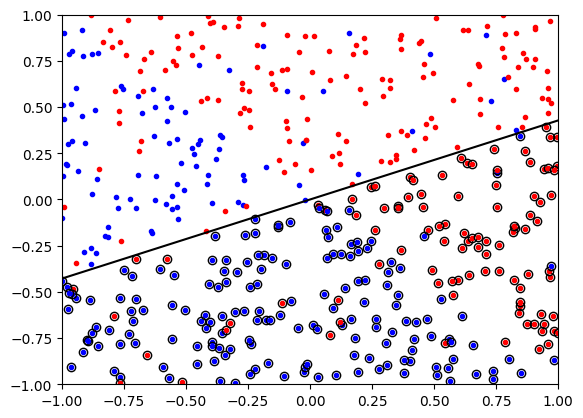

In [5]:
# Plot data points
for mu in range(len(y_labels)):
    if y_labels[mu] == 1 :
        plt.plot(X_states[mu, 0], X_states[mu, 1], 'r.')
    else :
        plt.plot(X_states[mu, 0], X_states[mu, 1], 'b.')
    # plot classification of network as circles
    if predictions[mu] == 1 :
        plt.plot(X_states[mu, 0], X_states[mu, 1], 'ko', mfc='none')

# Plot the decision bondary of the network
x1_span = np.linspace(-1,1,100)
x2_span = (-w[0]*x1_span + b ) / w[1] # Solves the equation w.(x1,x2)-b = 0 for x2
plt.plot(x1_span,x2_span,'k')

plt.axis([-1, 1, -1, 1])
plt.show()

In [6]:
#model.fit(X_states, y_labels, epochs=5)


model = train(model, X_states, y_labels, epochs=10)
predictions = model.predict(X_states)
w, b = model.w, model.b

Epoch 1/10 – Loss: 0.2515 – Accuracy: 0.85
Epoch 2/10 – Loss: 0.2412 – Accuracy: 0.86
Epoch 3/10 – Loss: 0.2359 – Accuracy: 0.87
Epoch 4/10 – Loss: 0.2325 – Accuracy: 0.87
Epoch 5/10 – Loss: 0.2301 – Accuracy: 0.87
Epoch 6/10 – Loss: 0.2282 – Accuracy: 0.87
Epoch 7/10 – Loss: 0.2268 – Accuracy: 0.88
Epoch 8/10 – Loss: 0.2255 – Accuracy: 0.88
Epoch 9/10 – Loss: 0.2245 – Accuracy: 0.88
Epoch 10/10 – Loss: 0.2236 – Accuracy: 0.88
Training accuracy: 0.88


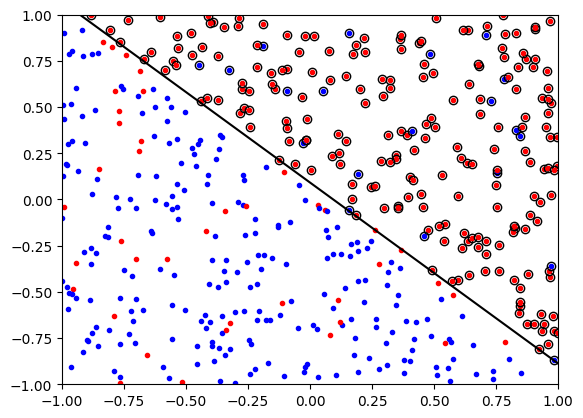

In [7]:
# Plot data points
for mu in range(len(y_labels)):
    if y_labels[mu] == 1 :
        plt.plot(X_states[mu, 0], X_states[mu, 1], 'r.')
    else :
        plt.plot(X_states[mu, 0], X_states[mu, 1], 'b.')
    # plot classification of network as circles
    if predictions[mu] == 1 :
        plt.plot(X_states[mu, 0], X_states[mu, 1], 'ko', mfc='none')

# Plot the decision bondary of the network
x1_span = np.linspace(-1,1,100)
x2_span = (-w[0]*x1_span + b ) / w[1] # Solves the equation w.(x1,x2)-b = 0 for x2
plt.plot(x1_span,x2_span,'k')

plt.axis([-1, 1, -1, 1])
plt.show()